<a href="https://colab.research.google.com/github/cool60334/111-TibaMe-AI-03-Machine-Learning/blob/main/ML_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
# df.to_csv("iris.csv", encoding = "utf-8", index=False)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns # 讓圖變好看

# 直接顯示圖表
%matplotlib inline

In [8]:
df.corr() # 相關係數表

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


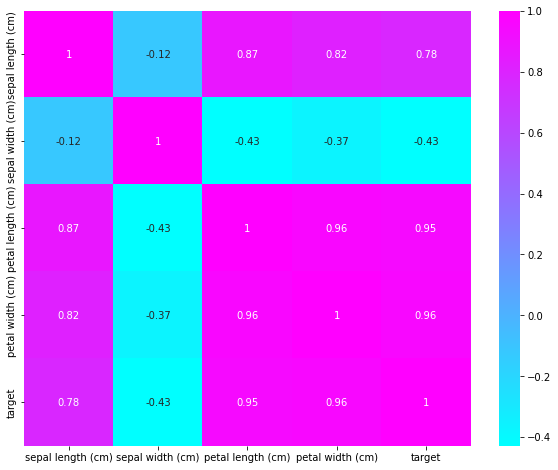

In [9]:
plt.figure(figsize=(10,8)) # 調整圖的大小(寬,高)
sns.heatmap(df.astype("float").corr(), cmap="cool", annot=True) # 熱度圖

In [10]:
from sklearn.model_selection import train_test_split # 回傳(特徵90%，特徵10%，目標90%，目標10%)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), df["target"], test_size=0.1)

In [12]:
from sklearn.cluster import KMeans

In [35]:
clu = KMeans(n_clusters=3, init="k-means++")  # init="k-means++" -> 讓剛開始的圓心彼此距離遠一點
clu.fit(x_train)  # 只帶入題目

KMeans(n_clusters=3)

In [36]:
clu.labels_

array([0, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1,
       0, 0, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 1,
       2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0,
       2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       0, 0, 1], dtype=int32)

In [37]:
pre = clu.predict(x_test)
print(f"預測結果:{list(pre)}")
print(f"真正標籤:{list(y_test)}")

預測結果:[0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0]
真正標籤:[0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 2, 0]


In [38]:
from sklearn.metrics import accuracy_score  # 模型準確率
print(f"預測成功機率: {accuracy_score(y_test, pre)}")

預測成功機率: 0.6


In [33]:
from sklearn.metrics import silhouette_score
x = df.drop(["target"], axis=1)  # 去除表格中的答案那一行

plotx = []
ploty = []


for k in range(2, 6):
  clu = KMeans(n_clusters=k)
  clu.fit(x)
  s = silhouette_score(x, clu.labels_)
  plotx.append(k)
  ploty.append(s)

print(f"K值:{plotx}")
print(f"Score:{ploty}")

K值:[2, 3, 4, 5]
Score:[0.6810461692117462, 0.5528190123564095, 0.49805050499728737, 0.48874888709310566]


Text(0, 0.5, 'Score')

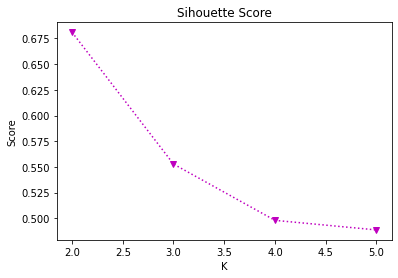

In [34]:
plt.plot(plotx, ploty, "mv:")  # 繪製圖形，可自訂線的造型
plt.title("Sihouette Score")  # 圖表名稱
plt.xlabel("K")  # 圖表X座標名稱
plt.ylabel("Score")  # 圖表Y座標名稱